In [16]:
! python -c 'import pyrosetta_installer; pyrosetta_installer.install_pyrosetta()' > /dev/null 2>&1
! pip install BioPython pyrosetta-installer pyrosetta-distributed py3Dmol > /dev/null 2>&1

# get the CryoEM structure of ttyh1 from PDB
## Download entire PDB file

In [2]:
import urllib
urllib.request.urlretrieve('http://files.rcsb.org/download/7P5J.pdb', '7p5j_wt.pdb')

('7p5j_wt.pdb', <http.client.HTTPMessage at 0x7f6834925750>)

## Extracting chain A

In [3]:
from Bio.PDB import PDBParser, PDBIO

# Parse the downloaded PDB file
parser = PDBParser()
structure = parser.get_structure('7p5j', '7p5j_wt.pdb')
pdb_code = "7p5j"

# Create a PDBIO object for saving PDB files
io = PDBIO()

# For each model in the structure (assuming you want Chain A from all models)
for model in structure:
    # Extract Chain A
    chain_a = model['A']

    # Set the structure to only include Chain A for saving
    structure.detach_child(model.id)
    model.detach_child('A')
    model.add(chain_a)
    structure.add(model)

    # Save Chain A to a new PDB file
    chain_a_file = f"{pdb_code}_wt_chain_A.pdb"
    io.set_structure(structure)
    io.save(chain_a_file)
    print(f"Saved Chain A to {chain_a_file}")

    # If you only want Chain A from the first model, break after the first iteration
    break

Saved Chain A to 7p5j_wt_chain_A.pdb


/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6622.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6650.
  warnings.warn(


## visualize chain A

In [4]:
import py3Dmol

# Define the path to your PDB file
pdb_file_path = '7p5j_wt.pdb'

# Read the PDB file
with open(pdb_file_path, 'r') as file:
    pdb_content = file.read()

# Create a viewer object
viewer = py3Dmol.view(width=800, height=400)

# Add the PDB content to the viewer
viewer.addModel(pdb_content, 'pdb')

# Color chain Aand B
viewer.setStyle({'chain': 'A'}, {'cartoon': {'color': 'gray'}})
viewer.setStyle({'chain': 'B'}, {'cartoon': {'color': 'lightgray'}})
# Zoom to fit the molecule
viewer.zoomTo()

# Show the visualization
viewer.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## get fasta sequence from PDB

In [5]:
def pdb_to_fasta(pdb_filename):
    """
    Converts a PDB file to FASTA format.

    Args:
    - pdb_filename: Path to the PDB file.

    Returns:
    - A string containing the FASTA formatted sequences of all chains found in the PDB file.
    """
    # Dictionary to convert three-letter amino acid codes to one-letter codes
    aa_dict = {
        'ALA': 'A', 'ARG': 'R', 'ASN': 'N', 'ASP': 'D', 'CYS': 'C',
        'GLU': 'E', 'GLN': 'Q', 'GLY': 'G', 'HIS': 'H', 'ILE': 'I',
        'LEU': 'L', 'LYS': 'K', 'MET': 'M', 'PHE': 'F', 'PRO': 'P',
        'SER': 'S', 'THR': 'T', 'TRP': 'W', 'TYR': 'Y', 'VAL': 'V'
    }

    # Initialize variables
    sequences = {}  # Dictionary to hold sequences for each chain
    prev_residue = None  # To keep track of residues and avoid duplicates

    # Read the PDB file
    with open(pdb_filename, 'r') as file:
        for line in file:
            if line.startswith('ATOM'):
                chain_id = line[21]  # Chain identifier is at column 22
                residue_name = line[17:20].strip()  # Residue name is columns 18-20
                residue_id = line[22:27].strip()  # Residue ID to identify unique residues

                # Check if residue is in the dictionary (i.e., is an amino acid) and is not a duplicate
                if residue_name in aa_dict and prev_residue != (chain_id, residue_id):
                    if chain_id not in sequences:
                        sequences[chain_id] = ''
                    sequences[chain_id] += aa_dict[residue_name]
                    prev_residue = (chain_id, residue_id)

    # Format sequences in FASTA format
    fasta_format = ''
    for chain_id, sequence in sequences.items():
        fasta_format += f'>{pdb_filename} Chain {chain_id}\n'
        fasta_format += '\n'.join([sequence[i:i+60] for i in range(0, len(sequence), 60)]) + '\n'

    return fasta_format

# Example usage
pdb_filename = '7p5j_wt.pdb'
fasta_output = pdb_to_fasta(pdb_filename)
print(fasta_output)

>7p5j_wt.pdb Chain A
PGYRPSAWVHLLHQLPRADFQLRPVPSVFAPQEQEYQQALLLVAALAGLGLGLSLIFIAV
YLIRFCVTWSCIVALLAGCTGIGIGFYGNSETSDGVSQLSSALLHANHTLSTIDHLVLET
VERLGEAVRTELTTLEEVLEPRTELVAAARGARRQAEAAAQQLQGLAFWQGVPLSPLQVA
ENVSFVEEYRWLAYVLLLLLELLVCLFTLLGLAKQSKWLVIVMTVMSLLVLVLSWGSMGL
EAATAVGLSDFCSNPDPYVLNLTQEETGLSSDILSYYLLCNRAVSNPFQQRLTLSQRALA
NIHSQLLGLEREAVPQFPSAQKPLLSLEETLNVTEGNFHQLVALLHCRSLHKDYGAALRG
LCEDALEGLLFLLLFSLLSAGALATALCSLPRAWALFPP
>7p5j_wt.pdb Chain B
PGYRPSAWVHLLHQLPRADFQLRPVPSVFAPQEQEYQQALLLVAALAGLGLGLSLIFIAV
YLIRFCVTWSCIVALLAGCTGIGIGFYGNSETSDGVSQLSSALLHANHTLSTIDHLVLET
VERLGEAVRTELTTLEEVLEPRTELVAAARGARRQAEAAAQQLQGLAFWQGVPLSPLQVA
ENVSFVEEYRWLAYVLLLLLELLVCLFTLLGLAKQSKWLVIVMTVMSLLVLVLSWGSMGL
EAATAVGLSDFCSNPDPYVLNLTQEETGLSSDILSYYLLCNRAVSNPFQQRLTLSQRALA
NIHSQLLGLEREAVPQFPSAQKPLLSLEETLNVTEGNFHQLVALLHCRSLHKDYGAALRG
LCEDALEGLLFLLLFSLLSAGALATALCSLPRAWALFPP



# mutate the argine at location 190

In [6]:
# wt fasta
fa_wt = 'PGYRPSAWVHLLHQLPRADFQLRPVPSVFAPQEQEYQQALLLVAALAGLGLGLSLIFIAVYLIRFCVTWSCIVALLAGCTGIGIGFYGNSETSDGVSQLSSALLHANHTLSTIDHLVLETVERLGEAVRTELTTLEEVLEPRTELVAAARGARRQAEAAAQQLQGLAFWQGVPLSPLQVAENVSFVEEYRWLAYVLLLLLELLVCLFTLLGLAKQSKWLVIVMTVMSLLVLVLSWGSMGLEAATAVGLSDFCSNPDPYVLNLTQEETGLSSDILSYYLLCNRAVSNPFQQRLTLSQRALANIHSQLLGLEREAVPQFPSAQKPLLSLEETLNVTEGNFHQLVALLHCRSLHKDYGAALRGLCEDALEGLLFLLLFSLLSAGALATALCSLPRAWALFPP'

In [7]:
# Define the main sequence and the substring to find its starting position
substring = "VEEYR"

# Find the start position of the substring in the sequence
start_position = fa_wt.find(substring) + 1  # Adding 1 to convert from 0-based to 1-based index

start_position

186

In [8]:
# Position to mutate (0-indexed)
mutation_position = 189

# Dictionary to store mutated sequences
mutated_sequences = {}

# Iterate over all amino acids
for aa in 'ARNDCQEGHILKMFPSTWYV':
    # Copy the WT sequence and replace the amino acid at the mutation position
    mutated_sequence = list(fa_wt)
    mutated_sequence[mutation_position] = aa
    mutated_sequences[f'fa_mut_R{mutation_position+1}_{aa}'] = ''.join(mutated_sequence)

In [9]:
sequences_fa = mutated_sequences.copy()
sequences_fa['fa_wt'] = fa_wt

In [10]:
# sanity check
print([char for char in sequences_fa['fa_wt']][185:195])
print([char for char in sequences_fa['fa_mut_R190_A']][185:195])

['V', 'E', 'E', 'Y', 'R', 'W', 'L', 'A', 'Y', 'V']
['V', 'E', 'E', 'Y', 'A', 'W', 'L', 'A', 'Y', 'V']


# ESMv2: Make API Request

There is already a server on BioLM with ESMFold loaded into memory, so predictions should be fast. Let's import the `requests` library.

In [11]:
# BioLM.ai token
BIOLMAI_TOKEN = 'XXX' # biolm.ai

In [12]:
#for sequence_name, sequence in list(mutated_sequences.items())[:1]:
#    print(sequence_name)
#    print(sequence)

In [13]:
import requests
import time
import json

# SLUG and ACTION remain the same
SLUG = 'esmfold-singlechain'
ACTION = 'predict'
# Model endpoint URL
url = f"https://biolm.ai/api/v2/{SLUG}/{ACTION}/"
# Headers for the request
headers = {
            "Content-Type": "application/json",
            "Authorization": f"Token {BIOLMAI_TOKEN.strip()}",
            }


# Iterate over each sequence in the mutated_sequence dictionary
for sequence_name, sequence in sequences_fa.items():# check: list(mutated_sequences.items())[:1]
    # Convert to the desired output name format
    old_prefix = "fa"
    pdb_id = "7p5j_fa"
    sequence_name = sequence_name.replace(old_prefix, pdb_id)

    # JSON payload to send to model endpoint for each sequence
    data = {
        "items": [{
            "sequence": sequence
        }]
    }

    s = time.time()  # Start time
    # Send the POST request
    response = requests.post(url, headers=headers, json=data)
    e = time.time()  # End time
    d = e - s  # Duration
    print(f'Response time: {d:.4}s')

    # Check if the request was successful
    if response.status_code == 200:
        # Extract the result in json format
        result = response.json()
        # Extract the contents of the PDB file
        result = result['results'][0]['pdb']
        # Write the response to a PDB file
        with open(f'{sequence_name}.pdb', 'w') as f:
            f.write(result)
    else:
        print(f'Response time for sequence {sequence_name}: {d:.4f}s')

print("PDB files generated for all sequences.")

Response time: 0.3994s
Response time: 0.3418s
Response time: 0.3325s
Response time: 0.2817s
Response time: 0.2839s
Response time: 0.3046s
Response time: 0.2789s
Response time: 0.2567s
Response time: 0.3582s
Response time: 0.2939s
Response time: 0.3794s
Response time: 0.3764s
Response time: 0.2862s
Response time: 0.3443s
Response time: 0.3477s
Response time: 0.2993s
Response time: 0.3089s
Response time: 0.3612s
Response time: 0.3117s
Response time: 0.3257s
Response time: 0.266s
PDB files generated for all sequences.


## Iterate through the ESMv2 output pdb files and compare them with the CryoEM structure

In [ ]:
import os
from Bio.PDB import PDBParser, Superimposer
import csv

# Initialize a PDB parser
parser = PDBParser()

# Load the reference structure
ref_structure = parser.get_structure("Reference", "7p5j_wt.pdb")

# Select the first model and first chain from the reference structure
ref_model = ref_structure[0]
ref_chain = list(ref_model.get_chains())[0]

# List to store CA atoms from the reference chain
ref_atoms = [atom for atom in ref_chain.get_atoms() if atom.get_name() == "CA"]

# Initialize a list to store RMSD values
rmsd_results = []

# Iterate over all files in the current directory
for filename in os.listdir('.'):
    if filename.startswith('7p5j_fa') and filename.endswith('.pdb'):
        # Load the structure
        structure = parser.get_structure("Structure", filename)

        # Select the first model and first chain
        model = structure[0]
        chain = list(model.get_chains())[0]

        # List to store CA atoms
        atoms = [atom for atom in chain.get_atoms() if atom.get_name() == "CA"]

        # Initialize the Superimposer object
        sup = Superimposer()

        # Align the structures
        sup.set_atoms(ref_atoms, atoms)

        # Append the filename and RMSD to the results list
        rmsd_results.append([filename, sup.rms])

# Save the results to a CSV file
with open('RMSD.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Filename', 'RMSD (Å)'])
    writer.writerows(rmsd_results)

print("RMSD calculation is complete. Results are saved in RMSD.csv.")

In [68]:
import glob
from pyrosetta import *
from pyrosetta.rosetta.core.scoring import CA_rmsd
from pyrosetta.rosetta.protocols.simple_moves import AlignChainMover
import csv

# Initialize PyRosetta
init(extra_options="-mute all")

# Load reference structure
ref_pose = pose_from_file("7p5j_wt_chain_A.pdb")

# Create a score function for RMSD calculation (not used directly for RMSD but can be useful for other analysis)
scorefxn = get_score_function()

# Prepare CSV file for output
with open('pRMSD.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['PDB File', 'Residue', 'RMSD'])

    # Iterate over all PDB files starting with "7p5j_fa"
    for pdb_file in glob.glob('7p5j_fa*.pdb'):
        # Load the structure for which you want to calculate RMSD
        pose = pose_from_pdb(pdb_file)

        # Align the structures
        aligner = rosetta.protocols.simple_moves.AlignChainMover()
        aligner.pose(ref_pose)
        aligner.source_chain(1)  # Assuming we're aligning chain 1
        aligner.target_chain(1)  # And that the target chain is also 1
        aligner.apply(pose)

        # Calculate per-residue RMSD
        rmsd_per_residue = []
        for i in range(1, pose.total_residue() + 1):
            res_rmsd = rosetta.core.scoring.CA_rmsd(ref_pose, pose, i)
            rmsd_per_residue.append((i, res_rmsd))

            # Write RMSD values for each residue to CSV
            csvwriter.writerow([pdb_file, i, res_rmsd])


┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│              See LICENSE.md or email license@uw.edu for details              │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python310.ubuntu 2024.10+release.2c36cbc7108d85646ca5b8ddc89c29ac1ccde88e 2024-03-01T16:53:36] retrieved from: http://www.pyrosetta.org


## Visualize RMSD and pRMSD

In [69]:
import pandas as pd

RMSD = pd.read_csv('RMSD.csv', index_col = 0)
pRMSD = pd.read_csv('pRMSD.csv')

# reshape pRMSD for visualization
# Use the pivot method to reorganize the DataFrame
pRMSD_pivot = pRMSD.pivot(index='PDB File', columns='Residue', values='RMSD')

# Rename the columns to follow the "Residue x" format
pRMSD_pivot.columns = [f"Resi{col}" for col in pRMSD_pivot.columns]

In [70]:
# prepare data frame for visualization
full_RMSD = RMSD.join(pRMSD_pivot)
full_RMSD = full_RMSD.rename(index=lambda x: x.replace("7p5j_fa_", "").replace(".pdb", ""))

<Figure size 640x480 with 0 Axes>

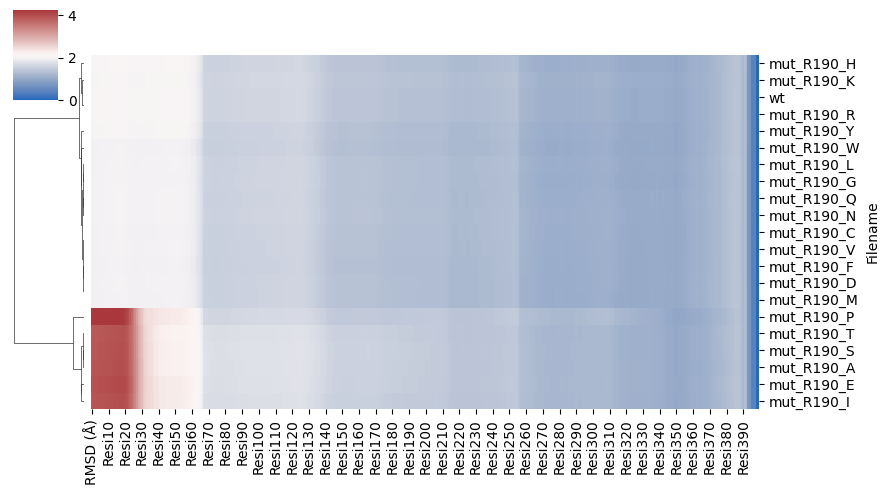

In [71]:
# visualize
import seaborn as sns
import matplotlib.pyplot as plt
full_RMSD = full_RMSD.fillna(0)
# Plot using seaborn
plt.figure()
sns.clustermap(full_RMSD,
               figsize=(9, 5), dendrogram_ratio = 0.1,
               row_cluster=True, col_cluster=False,
               #cbar_pos=None,
               cmap='vlag',
               linecolor='white')
plt.show()

# visualize pLDDT by residue

In [72]:
import os
import numpy as np
import pandas as pd
from Bio.PDB import PDBParser
import warnings
from Bio import BiopythonWarning

# List of mutation alternatives for R190
residue = list('ARNDCQEGHILKMFPSTWYV')  # Actual file identifiers

# Initialize a list to store pLDDT scores for each file
pLDDT_list = []

# Iterate over your files
indices = []  # For storing the custom indices
for identifier in residue:
    warnings.filterwarnings("ignore", category=BiopythonWarning)
    file_name = f"7p5j_fa_mut_R190_{identifier}.pdb"

    # Customize the index name; mark the wild type (wt) for R
    index_name = f"mut_R190_{identifier}" if identifier != 'R' else 'wt'
    indices.append(index_name)

    # Parse the PDB file
    parser = PDBParser()
    structure = parser.get_structure('struct', file_name)

    # Assuming there's one model, and extracting pLDDT for the first chain
    chain = next(structure.get_chains())
    pLDDT = [residue['CA'].get_bfactor() if 'CA' in residue else 0 for residue in chain.get_residues()]
    pLDDT_list.append(pLDDT)

# Convert the list of lists to a 2D NumPy array for plotting
pLDDT_array = np.array(pLDDT_list)
# Create the DataFrame with custom indices
pLDDT_df = pd.DataFrame(pLDDT_array, index=indices)

# Add row names indicating residue positions, e.g., Resi1, Resi2, ..., Resi399
row_names = [f"Resi{i+1}" for i in range(pLDDT_df.shape[1])]
pLDDT_df.columns = row_names

In [73]:
# Function to bin pLDDT scores to categories
def map_plddt_to_category(plddt):
    if plddt >= 90:
        return 3  # Blue
    elif plddt >= 70:
        return 2  # Cyan
    elif plddt >= 50:
        return 1  # Yellow
    else:
        return 0  # Orange

# Apply the function to transform the DataFrame
pLDDT_transformed = pLDDT_df.applymap(map_plddt_to_category)

In [74]:
from matplotlib.colors import ListedColormap

# Define the colormap
cmap = ListedColormap(['#FF7E45', #'orange',
                       '#FFDB12', #'yellow',
                       '#57CAF9', #'cyan',
                       '#0053D7', #'blue'
                       ])

<Figure size 640x480 with 0 Axes>

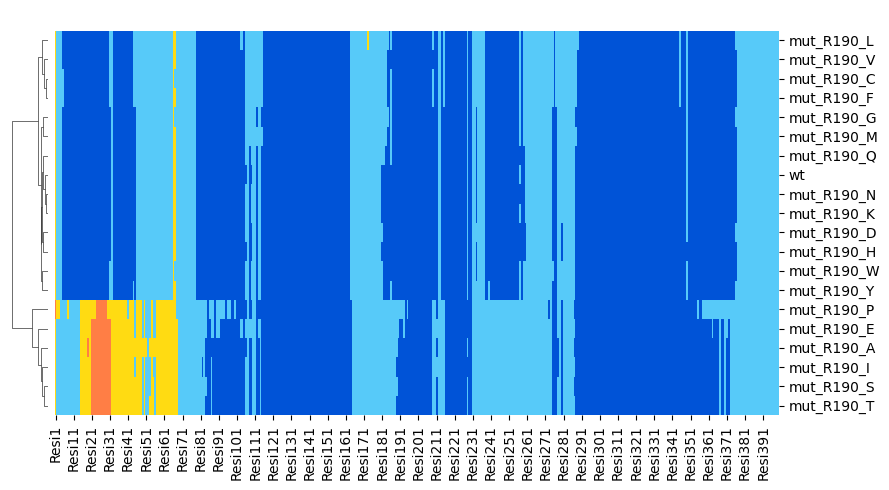

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
pLDDT_transformed = pLDDT_transformed.fillna(0)
# Plot using seaborn
plt.figure()
sns.clustermap(pLDDT_transformed,
               figsize=(9, 5), dendrogram_ratio = 0.05,
               row_cluster=True, col_cluster=False,
               cmap=cmap, cbar=False, cbar_pos=None, #linewidths=0.5,  # Adds grid lines with 0.5 width
               linecolor='white')  # Set cbar=False if you don't want the color bar
plt.show()


# More visualizzation
## hydrophobicity

In [67]:
import py3Dmol

# A simplified hydrophobicity scale (Kyte-Doolittle scale for illustration)
hydrophobicity_scale = {
    'ALA': 1.8,  # Alanine
    'ARG': -4.5, # Arginine
    'ASN': -3.5, # Asparagine
    'ASP': -3.5, # Aspartic Acid
    'CYS': 2.5,  # Cysteine
    'GLN': -3.5, # Glutamine
    'GLU': -3.5, # Glutamic Acid
    'GLY': -0.4, # Glycine
    'HIS': -3.2, # Histidine
    'ILE': 4.5,  # Isoleucine
    'LEU': 3.8,  # Leucine
    'LYS': -3.9, # Lysine
    'MET': 1.9,  # Methionine
    'PHE': 2.8,  # Phenylalanine
    'PRO': -1.6, # Proline
    'SER': -0.8, # Serine
    'THR': -0.7, # Threonine
    'TRP': -0.9, # Tryptophan
    'TYR': -1.3, # Tyrosine
    'VAL': 4.2   # Valine
}

# Map hydrophobicity to colors (simplified)
def hydrophobicity_to_color(hydrophobicity):
    if hydrophobicity > 3:
        return 'red'  # More hydrophobic
    elif hydrophobicity > 0:
        return 'white'  # Intermediate
    else:
        return 'blue'  # More hydrophilic

# Initialize viewer
viewer = py3Dmol.view(width=800, height=600)

# Load PDB structure
viewer.addModel(open('7p5j_fa_mut_R190_D.pdb', 'r').read(), 'pdb')
structure = parser.get_structure('PDB', '7p5j_fa_mut_R190_D.pdb')

# Apply color based on hydrophobicity
for model in structure:
    for chain in model:
        print(f"Chain {chain.id}")
        for residue in chain:
            aa = residue.get_resname()  # Correct method to get the residue name
            hydrophobicity = hydrophobicity_scale.get(aa, 0)  # Default to 0 if not found
            color = hydrophobicity_to_color(hydrophobicity)
            #viewer.setStyle({'resi': str(residue.get_id()[1]), 'chain': chain.id}, {'stick': {'colorscheme': f'{color}Carbon'}})
            viewer.setStyle({'resi': str(residue.id[1]), 'chain': chain.id}, {'cartoon': {'color': color}})

# Render the structure
viewer.zoomTo()
viewer.show()


Chain A


/usr/local/lib/python3.10/dist-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3069
  warnings.warn(


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [50]:
import py3Dmol

# A simplified hydrophobicity scale (Kyte-Doolittle scale for illustration)
hydrophobicity_scale = {
    'ALA': 1.8,  # Alanine
    'ARG': -4.5, # Arginine
    'ASN': -3.5, # Asparagine
    'ASP': -3.5, # Aspartic Acid
    'CYS': 2.5,  # Cysteine
    'GLN': -3.5, # Glutamine
    'GLU': -3.5, # Glutamic Acid
    'GLY': -0.4, # Glycine
    'HIS': -3.2, # Histidine
    'ILE': 4.5,  # Isoleucine
    'LEU': 3.8,  # Leucine
    'LYS': -3.9, # Lysine
    'MET': 1.9,  # Methionine
    'PHE': 2.8,  # Phenylalanine
    'PRO': -1.6, # Proline
    'SER': -0.8, # Serine
    'THR': -0.7, # Threonine
    'TRP': -0.9, # Tryptophan
    'TYR': -1.3, # Tyrosine
    'VAL': 4.2   # Valine
}

# Map hydrophobicity to colors (simplified)
def hydrophobicity_to_color(hydrophobicity):
    if hydrophobicity > 3:
        return 'red'  # More hydrophobic
    elif hydrophobicity > 0:
        return 'white'  # Intermediate
    else:
        return 'blue'  # More hydrophilic

# Initialize viewer
viewer = py3Dmol.view(width=800, height=600)

# Load PDB structure
pdb_id = 'YOUR_PDB_ID'  # Replace with your PDB ID
viewer.addModel(open('7p5j_fa_wt.pdb', 'r').read(), 'pdb')
structure = parser.get_structure('PDB', '7p5j_fa_mut_R190_M.pdb')

# Apply color based on hydrophobicity
for model in structure:
    for chain in model:
        print(f"Chain {chain.id}")
        for residue in chain:
            aa = residue.get_resname()  # Correct method to get the residue name
            hydrophobicity = hydrophobicity_scale.get(aa, 0)  # Default to 0 if not found
            color = hydrophobicity_to_color(hydrophobicity)
            #viewer.setStyle({'resi': str(residue.get_id()[1]), 'chain': chain.id}, {'stick': {'colorscheme': f'{color}Carbon'}})
            viewer.setStyle({'resi': str(residue.id[1]), 'chain': chain.id}, {'cartoon': {'color': color}})

# Render the structure
viewer.zoomTo()
viewer.show()


Chain A


/usr/local/lib/python3.10/dist-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3069
  warnings.warn(


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [66]:
import py3Dmol

# Define electric charge for amino acids using three-letter codes
electric_charge = {
    'ARG': 'positive',
    'LYS': 'positive',
    'HIS': 'positive',
    'ASP': 'negative',
    'GLU': 'negative',
    # All other amino acids are considered neutral in this context
}

def charge_to_color(charge):
    # Map the electric charge to a color
    if charge == 'positive':
        return 'blue'
    elif charge == 'negative':
        return 'red'
    else:
        return 'white'

# Load your PDB structure into Py3Dmol
viewer = py3Dmol.view(width=800, height=600)
viewer.addModel(open('7p5j_fa_mut_R190_D.pdb', 'r').read(), 'pdb')

viewer.setStyle({}, {'cartoon': {'color':'spectrum'}})  # Default coloring

# Now apply the electric charge-based coloring
# This loop is conceptual and assumes you have a structure object from Biopython loaded as `structure`
for model in structure:
    for chain in model:
        for residue in chain:
            aa = residue.get_resname()
            charge = electric_charge.get(aa, 'neutral')  # Default to 'neutral' if not found
            color = charge_to_color(charge)
            # Set the style for each residue based on its electric charge
            viewer.setStyle({'resi': str(residue.id[1]), 'chain': chain.id}, {'cartoon': {'color': color}})

viewer.zoomTo()
viewer.show()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.